# Analyzing Roulette Betting Strategies: A Simulation-Based Approach to Martingale, Fibonacci, and D'Alembert Strategies

In [18]:
import Project_functions
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import statistics

## Introduction

Have you ever wondered why roulette is one of the most iconic casino games in the western hemisphere? While luck and chance undeniably play a major role in determining success, is that really the whole story? What if players could strategically influence their winnings by adjusting how much they bet each round and deciding when to make changes? Perhaps roulette isn't purely a game of chance after all. In this blog post we try to answer these questions.

## Introduction to Roulette and Three Betting Strategies

Before diving into the hypothesis this blog post aims to address, let’s first explore the basics of roulette and three popular betting strategies that players often use to influence their outcomes. Understanding these fundamentals will provide the necessary context for our analysis.

### The Basics of Roulette

Roulette is a game centered around a spinning wheel divided into numbered pockets, typically ranging from 0 to 36. This is the setup in European roulette, which will be the focus of this post. In contrast, American roulette includes an additional green pocket labeled 00, which slightly alters the odds.

#### The Setup

Players place bets on a layout of numbers and options on the roulette table. These bets range from wagering on specific numbers to broader categories, such as odd/even, red/black, or groups of numbers. For simplicity, we will focus on odd/even and red/black bets, as they are straightforward and offer a payout of 1:1.

#### The Spin

Once bets are placed, the dealer spins the wheel in one direction and rolls a small ball in the opposite direction. The ball eventually lands in one of the numbered pockets.

#### The Outcome

The pocket where the ball lands determines the winning bets. Players who bet on the correct number, color, or category collect winnings based on a payout table, while others lose their bets.

### Betting Strategies: Martingale, Fibonacci, and D'Alembert

Now that we’ve covered the fundamentals of roulette, let’s delve into three popular betting strategies that players might use to increase their winnings: Martingale, Fibonacci, and D’Alembert.

#### Martingale Strategy

Start with a base bet. After a loss, double your next bet. After a win, return to your original base bet.

#### Fibonacci Strategy

This method is based on the Fibonacci sequence, where each number is the sum of the two preceding numbers (1, 1, 2, 3, 5, 8, …). Start with the first number in the sequence and bet an amount corresponding to that number (e.g., `$1`, `$10`, `$100`). After a loss, move to the next number in the sequence for your next bet. After a win, move back two steps in the sequence (or reset to the beginning if you are near the start).

#### D’Alembert Strategy

Start with a base unit (e.g., `$10`). After a loss, increase your next bet by one unit. After a win, decrease your bet by one unit, ensuring you never bet below the base unit.

## Hypothesis

With the basics out-of-the-way, we can now pose the central hypothesis of this blog post:

Can betting strategies such as Martingale, Fibonacci, or D’Alembert overcome the house edge in roulette over a long series of bets?

## Data

To investigate our hypothesis, we will utilize simulated roulette data from https://www.kaggle.com/datasets/flynn28/simulated-roulette-data. Specifically, we will analyze datasets simulating 10,000 and 100,000 rounds of roulette, processed using the Python library `pandas`. Simulated data is used because casinos typically do not make real-world roulette data publicly available, making simulations an invaluable resource for exploring patterns and testing strategies.

In [3]:
roulette_10000_rounds_df = pd.read_csv("roulette_10000_rounds.csv")
roulette_100000_rounds_df = pd.read_csv("roulette_100000_rounds.csv")

## Setup

We will begin by simulating 16 different games of roulette, covering four betting strategies: Martingale, Fibonacci, D'Alembert, and a baseline approach we’ll refer to as *no strategy*. For each strategy, we simulate four games where the player bets on red, black, even and odd. In all cases, the player begins with a base bet of `$10`, adapting subsequent bets according to the chosen strategy. For the *no strategy* baseline, the player bets a random amount between `$5` and `$20` each round. Additionally, no limit is imposed on the player’s total capital during these simulations.

## Approach and Analysis

To analyze the performance of different betting strategies, we create four functions: `no_strategy()`, `martingale_strategy()`, `fibonacci_strategy()`, and `d_alembert_strategy()`. Each function simulates its respective betting approach. Using these functions in conjunction with `plot_strategies_2x2()`, we visualize the net profit achieved by each strategy over 10,000 simulated rounds of roulette. The resulting plots are shown below.

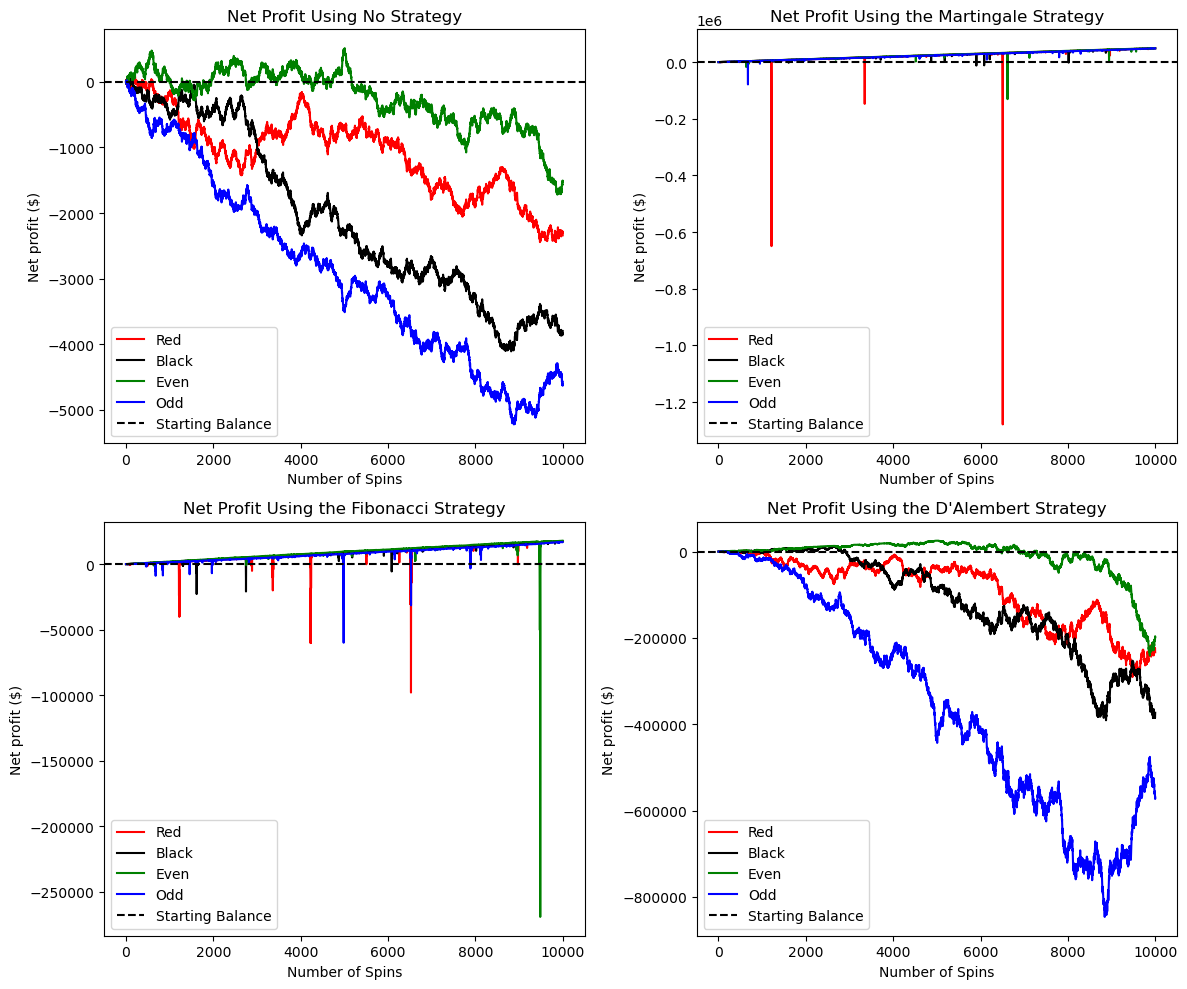

In [9]:
# Run and plot the strategies using 10,000 rounds
Project_functions.plot_strategies_2x2(roulette_10000_rounds_df, 10)

Straight away we notice a pattern in these plots. The results for the *no strategy* and D'Alembert approaches share similarities: both show jagged, fluctuating lines with a noticeable downward trend. In contrast, the plots for the Martingale and Fibonacci strategies show a steady but slow upward trajectory. To determine if these trends persist over a larger dataset, we now analyze the results using the simulated data from 100,000 rounds of roulette.

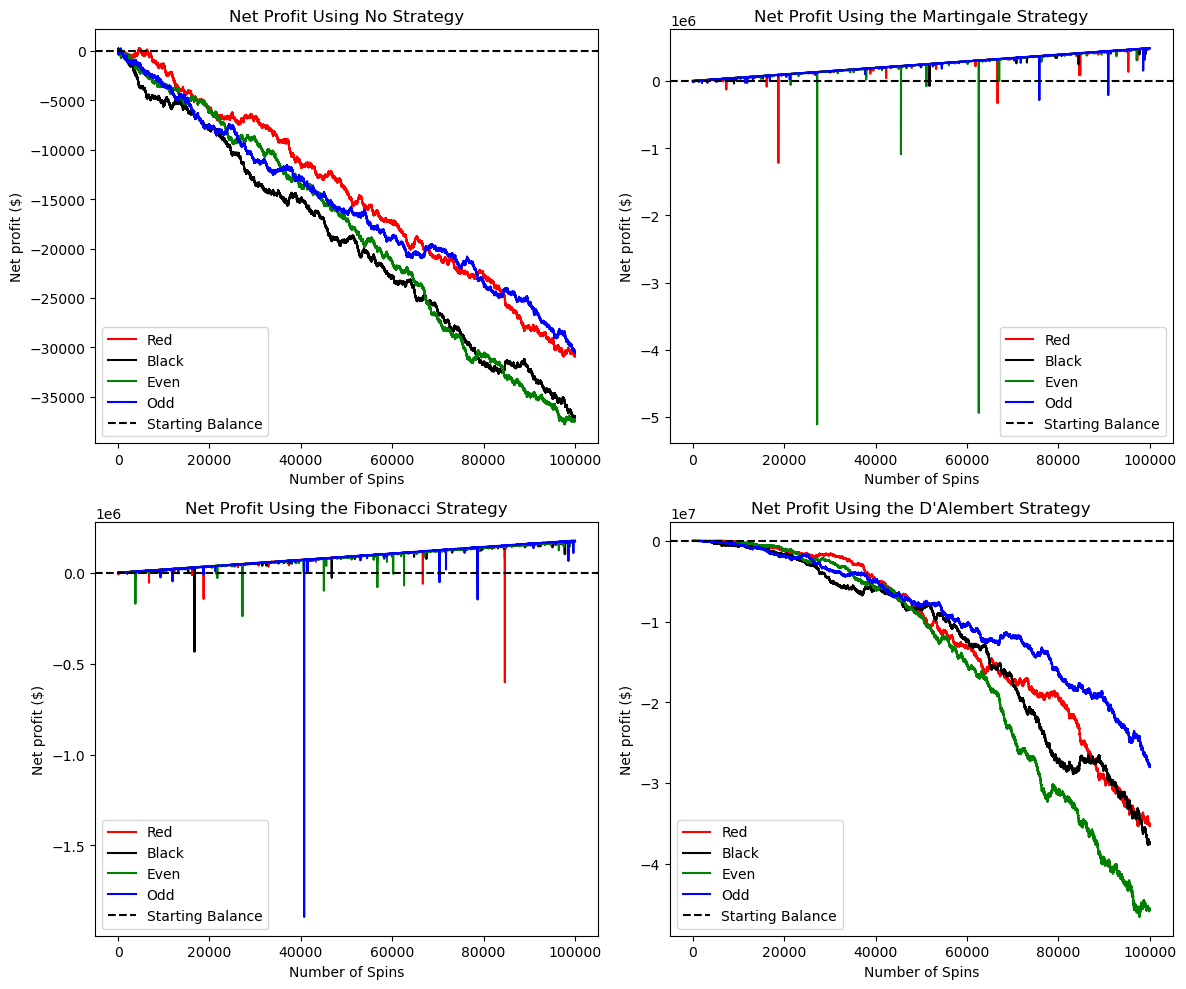

In [10]:
# Run and plot the strategies using 100,000 rounds
Project_functions.plot_strategies_2x2(roulette_100000_rounds_df, 10)

The plots confirm that the observed trends are consistent. Across simulations of both 10,000 and 100,000 rounds of roulette, the *no strategy* and D'Alembert approaches consistently result in losses.

Up to this point, we have assumed no limits on the amount a player can bet per round. However, this is unrealistic, as casinos typically impose table limits to cap bets. To reflect real-life conditions, we will continue our analysis of the Martingale and Fibonacci strategies utilizing table limits. These strategies show an upward trend, unlike the *no strategy* and D'Alembert strategies, which show a clear downward trajectory. Using table limits on these two strategies would only further constrain them, making them irrelevant to our analysis.

The table limits used in this analysis were scraped using the selenium package from online roulette games on https://www.livedealer.org/live-casino-games/table-bet-limits/ and https://roulette77.us/blog/explanation-of-betting-limits. From the scraped data, we derived the following table limits (min, max and mean of all the scraped table limits): `$500`, `$75,000` and `$18,000` (rounded down to the nearest thousand). These values form the basis of our new analysis.

To incorporate these constraints, we created three new functions: `martingale_strategy_with_table_limits()`, `fibonacci_strategy_with_table_limits()`, and `plot_strategies_2x4()`. The resulting plots are presented below.

In [11]:
# Run and plot the strategies Martingale and Fibonacci using table limits with 10,000 rounds
Project_functions.plot_strategies_2x4(martingale_result_10000_rounds, fibonacci_result_10000_rounds, table_limits)

NameError: name 'martingale_result_10000_rounds' is not defined

From these plots, we observe that approximately one-third of the lines end above the starting balance after 10,000 rounds. To investigate whether this pattern holds over longer durations, we generate similar plots using data from 100,000 rounds.

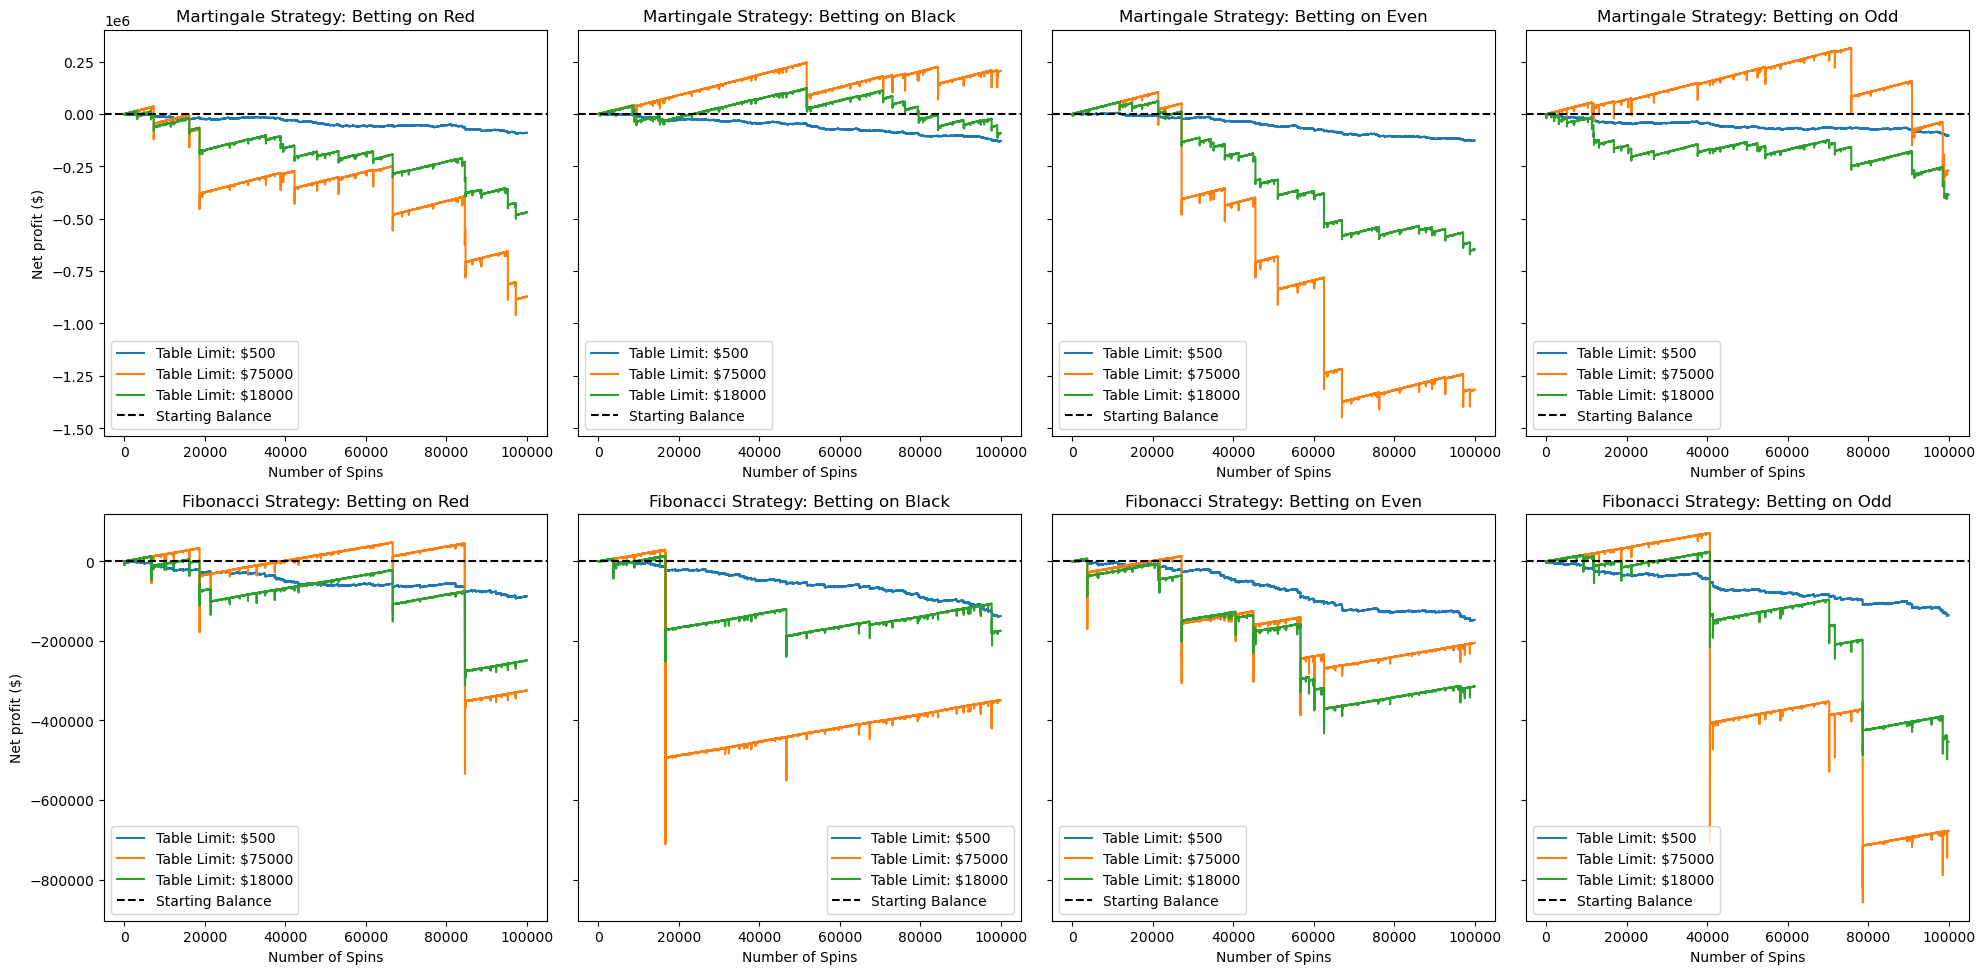

In [244]:
# Run and plot the strategies Martingale and Fibonacci using table limits with 100,000 rounds
plot_strategies_2x4(martingale_result_100000_rounds, fibonacci_result_100000_rounds, table_limits)

From these plots, we observe that only one line-the orange one in the second plot on the first row-ends above the starting balance after 100,000 rounds. This suggests that the longer the game continues, the more prominent the house edge becomes. Based on our findings thus far in this blog post, we can finally draw our conclusion.

## Result

The result from our analysis suggests that, over time, the casino will always win, although it might take a very long time. In reality, most players won’t play 100,000 rounds in one sitting, so strategies like Martingale and Fibonacci could potentially yield short-term gains. However, due to the presence of the green 0, which gives the house its advantage, the house will ultimately win in the long run. To answer our hypothesis: no, you cannot beat the house edge in roulette over an extended series of bets using betting strategies.

## Discussion

Throughout this blog post, we have relied on simulated roulette data rather than real-life data. While this may be seen as a limitation, it’s important to note that roulette is primarily a game of chance and randomness, so the use of simulated data doesn't significantly change the conclusions drawn from our analysis.

As a final note, since roulette is fundamentally a game of chance, no betting strategy can influence the probability of where the ball will land. While strategies such as Martingale and Fibonacci may offer short-term gains, they come with no guarantees and cannot overcome the house edge in the long run. Ultimately, roulette should be played with the understanding that it's a form of entertainment, not a surefire way to make money.

- Important: The measurement is the amount of money the player won
- Budget: We only care about how much profit the player made after 10,000 rounds (it can of course be negative profit)
- Payout: 1 to 1 
- 10,000 Rounds
  - No strategy
    - Amount: Random amount $5-$20
  - Martingale
    - Amount: From strategy
  - Fibonacci
    - Amount: From strategy
  - D'Alembert
    - Amount: From strategy
    
TITTA HUR JAG SKA GÖRA MED ATT IMPORTERA OCH INSTALLERA LIBRARYS (KANSKE MÅSTE SKRIVA pip install ...)

TITTA WORD COUNT

VART SKA ALL KOD VARA, I VILKEN ORDNING OSV

In [207]:
def no_strategy(data, initial_bet):
    """
    Simulates a random betting strategy in roulette.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        Initial bet amount for the first spin.

    Returns:
    -------
    dict
        Cumulative balances for each bet type ("red", "black", "even", "odd") as lists.

    Notes:
    ------
    - First bet is the initial_bet amount.
    - Subsequent bets are random amounts between $5 and $20.
    - Balances are updated based on wins or losses for each spin.
    """
    # Initialize balances
    balances = {"red": [0], "black": [0], "even": [0], "odd": [0]}

    for spin, (_, row) in enumerate(data.iterrows()):
        
        # Use initial_bet for the first spin; random bet otherwise
        bet = initial_bet if spin == 0 else random.randint(5, 20)
        
        # Update balances
        balances["red"].append(balances["red"][-1] + (bet if row["Red Bet Win"] == 1 else -bet))
        balances["black"].append(balances["black"][-1] + (bet if row["Black Bet Win"] == 1 else -bet))
        balances["even"].append(balances["even"][-1] + (bet if row["Even Bet Win"] == 1 else -bet))
        balances["odd"].append(balances["odd"][-1] + (bet if row["Odd Bet Win"] == 1 else -bet))

    return balances

In [209]:
def martingale_strategy(data, initial_bet):
    """
    Simulates the Martingale betting strategy for roulette.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        Initial bet amount.

    Returns:
    -------
    dict
        Cumulative balances for each bet type ("red", "black", "even", "odd") as lists.

    Notes:
    ------
    - On a win, the bet resets to the initial bet.
    - On a loss, the bet doubles for the next spin.
    """
    # Initialize variables
    balances = {"red": [0], "black": [0], "even": [0], "odd": [0]}
    bets = {"red": initial_bet, "black": initial_bet, "even": initial_bet, "odd": initial_bet}

    for _, row in data.iterrows():
        for bet_type in balances.keys():
            bet = bets[bet_type]

            # Update balances
            if row[f"{bet_type.capitalize()} Bet Win"] == 1:  # Win
                balances[bet_type].append(balances[bet_type][-1] + bet)
                bets[bet_type] = initial_bet  # Reset bet to initial amount
            else:  # Loss
                balances[bet_type].append(balances[bet_type][-1] - bet)
                bets[bet_type] *= 2  # Double the bet amount

    return balances

In [210]:
def fibonacci_strategy(data, initial_bet):
    """
    Simulates the Fibonacci betting strategy for roulette.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        Initial bet amount.

    Returns:
    -------
    dict
        Cumulative balances for each bet type ("red", "black", "even", "odd") as lists.

    Notes:
    ------
    - Bets follow the Fibonacci sequence (e.g., 1, 1, 2, 3, 5, ...) for losses.
    - On a win, the sequence moves back two steps, or resets if at the beginning.
    """
    # Initialize variables
    balances = {"red": [0], "black": [0], "even": [0], "odd": [0]}
    sequences = {"red": [1, 1], "black": [1, 1], "even": [1, 1], "odd": [1, 1]}
    indices = {"red": 0, "black": 0, "even": 0, "odd": 0}

    for _, row in data.iterrows():
        for bet_type in balances.keys():
            current_index = indices[bet_type]
            bet = sequences[bet_type][current_index] * initial_bet

            # Update balances
            if row[f"{bet_type.capitalize()} Bet Win"] == 1:  # Win
                balances[bet_type].append(balances[bet_type][-1] + bet)
                indices[bet_type] = max(0, current_index - 2)
            else:  # Loss
                balances[bet_type].append(balances[bet_type][-1] - bet)
                indices[bet_type] += 1
                if indices[bet_type] >= len(sequences[bet_type]):
                    sequences[bet_type].append(sequences[bet_type][-1] + sequences[bet_type][-2])

    return balances

In [211]:
def d_alembert_strategy(data, initial_bet):
    """
    Simulates the D'Alembert betting strategy for roulette.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        Initial bet amount.

    Returns:
    -------
    dict
        Cumulative balances for each bet type ("red", "black", "even", "odd") as lists.

    Notes:
    ------
    - On a win, the bet decreases by the initial bet.
    - On a loss, the bet increases by the initial bet.
    """
    # Initialize variables
    balances = {"red": [0], "black": [0], "even": [0], "odd": [0]}
    bets = {"red": initial_bet, "black": initial_bet, "even": initial_bet, "odd": initial_bet}

    for _, row in data.iterrows():
        for bet_type in balances.keys():
            bet = bets[bet_type]

            # Update balances
            if row[f"{bet_type.capitalize()} Bet Win"] == 1:  # Win
                balances[bet_type].append(balances[bet_type][-1] + bet)
                bets[bet_type] = max(initial_bet, bet - initial_bet)
            else:  # Loss
                balances[bet_type].append(balances[bet_type][-1] - bet)
                bets[bet_type] += initial_bet

    return balances

In [227]:
def plot_strategies_2x2(data, initial_bet):
    """
    Plots the net profit of four roulette betting strategies in a 2x2 grid.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        The starting bet amount for all strategies.

    Returns:
    -------
    None
        Displays a 2x2 grid of line plots for the net profit of each strategy.

    Notes:
    ------
    - The strategies compared are: No Strategy, Martingale, Fibonacci, and D'Alembert.
    - Each subplot represents one strategy, showing balances for different bet types (Red, Black, Even, Odd).
    - Lines are color-coded for bet types, and a horizontal dashed line represents the starting balance.
    """
    strategies = {
        "No Strategy": no_strategy,
        "Martingale": martingale_strategy,
        "Fibonacci": fibonacci_strategy,
        "D'Alembert": d_alembert_strategy
    }

    colors = ["red", "black", "green", "blue"]  # Define colors for bet types
    titles = [
        "Net Profit Using No Strategy",
        "Net Profit Using the Martingale Strategy",
        "Net Profit Using the Fibonacci Strategy",
        "Net Profit Using the D'Alembert Strategy"
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # Flatten the grid for easy iteration

    for i, (strategy_name, strategy_function) in enumerate(strategies.items()):
        balances = strategy_function(data, initial_bet)
        ax = axes[i]

        # Plot balances for each bet type with custom colors
        for j, (bet_type, balance) in enumerate(balances.items()):
            ax.plot(balance, label=bet_type.capitalize(), color=colors[j])

        ax.set_title(titles[i])  # Set the custom title
        ax.set_xlabel("Number of Spins")
        ax.set_ylabel("Net profit ($)")
        ax.axhline(0, color='black', linestyle='--', label="Starting Balance")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [213]:
# Set up Selenium WebDriver
driver = webdriver.Chrome()
url = 'https://www.livedealer.org/live-casino-games/table-bet-limits/'
driver.get(url)

# Wait for the page to load completely
time.sleep(5)

# Get the fully rendered HTML
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table', {'class': 'sortable responsive-table'})

# Extract data from the table
large_table_data = []
for row in table.find_all('tr')[1:]: # Skip header row
    columns = row.find_all('td')
    roulette_max_bet = columns[4].get_text(strip=True)
    large_table_data.append(roulette_max_bet)

# Close the browser
driver.quit()

In [214]:
# Set up Selenium WebDriver
driver = webdriver.Chrome()
url = 'https://roulette77.us/blog/explanation-of-betting-limits'
driver.get(url)

# Wait for the page to load completely
time.sleep(5)

# Get the fully rendered HTML
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table', {'class': 'classic-table classic-table--min600'})

# Find all the rows in the table and get the last row
rows = table.find_all('tr')
last_row = rows[-1]

# Extract the columns from the last row
columns = last_row.find_all('td')
small_table_data = [
    columns[2].text.strip(),  
    columns[4].text.strip(),  
    columns[6].text.strip()   
]

# Close the browser
driver.quit()

In [215]:
# Combine the two lists into one list and convert each element to an integer
combined_data = large_table_data + small_table_data
combined_data = [int(max_bet) for max_bet in combined_data]

# Compute min, max, and mean
min_value = min(combined_data)
max_value = max(combined_data)
mean_value = statistics.mean(combined_data)

# Create a new list with min, max and mean
table_limits = [
    min_value,
    max_value,
    int(round(mean_value, -3))
]

In [235]:
def martingale_strategy_with_table_limits(data, initial_bet, table_limits):
    """
    Simulates the Martingale betting strategy with table limits for multiple bet types.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        The starting bet amount for the Martingale strategy.
    table_limits : list of int
        A list of table limits specifying the maximum allowable bet for each simulation.

    Returns:
    -------
    dict
        A nested dictionary where keys are table limits, and values are dictionaries of bet types
        ("red", "black", "even", "odd") with lists representing the cumulative balance over spins.

    Notes:
    ------
    - Implements the Martingale strategy, doubling the bet after a loss and resetting to the initial bet after a win.
    - Bets are capped by the table limit to prevent exceeding the maximum allowable bet.
    - Tracks balances separately for each combination of table limit and bet type.
    """
    results = {limit: {bet_type: [0] for bet_type in ["red", "black", "even", "odd"]} for limit in table_limits}

    for table_limit in table_limits:
        # Initialize bets
        bets = {bet_type: initial_bet for bet_type in ["red", "black", "even", "odd"]}

        for _, row in data.iterrows():
            for bet_type in bets.keys():
                bet = min(bets[bet_type], table_limit)  # Ensure bet adheres to the table limit

                # Update balances
                if row[f"{bet_type.capitalize()} Bet Win"] == 1:  # Win
                    results[table_limit][bet_type].append(results[table_limit][bet_type][-1] + bet)
                    bets[bet_type] = initial_bet  # Reset bet to initial amount
                else:  # Loss
                    results[table_limit][bet_type].append(results[table_limit][bet_type][-1] - bet)
                    bets[bet_type] = min(bets[bet_type] * 2, table_limit)  # Double the bet, respect table limit

    return results

In [234]:
def fibonacci_strategy_with_table_limits(data, initial_bet, table_limits):
    """
    Simulates the Fibonacci betting strategy with table limits for multiple bet types.

    Parameters:
    ----------
    data : pandas.DataFrame
        DataFrame with roulette outcomes. Columns: "Red Bet Win", "Black Bet Win", "Even Bet Win", "Odd Bet Win".
    initial_bet : int
        The starting bet amount for the Fibonacci strategy.
    table_limits : list of int
        A list of table limits specifying the maximum allowable bet for each simulation.

    Returns:
    -------
    dict
        A nested dictionary where keys are table limits, and values are dictionaries of bet types
        ("red", "black", "even", "odd") with lists representing the cumulative balance over spins.

    Notes:
    ------
    - Implements the Fibonacci betting strategy, where bets follow the Fibonacci sequence.
    - After a win, the bet moves back two steps in the Fibonacci sequence (or resets to the start).
    - After a loss, the bet moves forward one step in the sequence.
    - Bets are capped by the table limit to prevent exceeding the maximum allowable bet.
    - Extends the Fibonacci sequence dynamically as needed for prolonged losses.
    - Tracks balances separately for each combination of table limit and bet type.
    """
    results = {limit: {bet_type: [0] for bet_type in ["red", "black", "even", "odd"]} for limit in table_limits}

    for table_limit in table_limits:
        # Initialize variables
        sequences = {bet_type: [1, 1] for bet_type in ["red", "black", "even", "odd"]}
        indices = {bet_type: 0 for bet_type in ["red", "black", "even", "odd"]}

        for _, row in data.iterrows():
            for bet_type in sequences.keys():
                current_index = indices[bet_type]
                bet = min(sequences[bet_type][current_index] * initial_bet, table_limit)  # Adhere to table limit

                # Update balances
                if row[f"{bet_type.capitalize()} Bet Win"] == 1:  # Win
                    results[table_limit][bet_type].append(results[table_limit][bet_type][-1] + bet)
                    indices[bet_type] = max(0, current_index - 2)  # Move back two steps in the sequence
                else:  # Loss
                    results[table_limit][bet_type].append(results[table_limit][bet_type][-1] - bet)
                    indices[bet_type] += 1
                    # Extend Fibonacci sequence if needed
                    if indices[bet_type] >= len(sequences[bet_type]):
                        sequences[bet_type].append(sequences[bet_type][-1] + sequences[bet_type][-2])

    return results

In [236]:
martingale_result_10000_rounds = martingale_strategy_with_table_limits(roulette_10000_rounds_df, 10, table_limits)
fibonacci_result_10000_rounds = fibonacci_strategy_with_table_limits(roulette_10000_rounds_df, 10, table_limits)
martingale_result_100000_rounds = martingale_strategy_with_table_limits(roulette_100000_rounds_df, 10, table_limits)
fibonacci_result_100000_rounds = fibonacci_strategy_with_table_limits(roulette_100000_rounds_df, 10, table_limits)

In [243]:
def plot_strategies_2x4(martingale_data, fibonacci_data, table_limits):
    """
    Plots the results of Martingale and Fibonacci strategies across multiple bet types 
    and table limits in a 2x4 grid layout.

    Parameters:
    ----------
    martingale_data : dict
        Nested dictionary containing Martingale strategy results. 
        Keys are table limits, and values are dictionaries of bet types ("red", "black", "even", "odd") 
        with lists representing the cumulative balances over spins.
    fibonacci_data : dict
        Nested dictionary containing Fibonacci strategy results. 
        Same structure as `martingale_data`.
    table_limits : list of int
        List of table limits used to distinguish plotted lines.

    Notes:
    ------
    - The top row of plots corresponds to Martingale strategy results, and the bottom row corresponds to Fibonacci.
    - Each column represents one of the bet types: "red", "black", "even", or "odd".
    - Lines for each table limit are plotted within each subplot, and balances are compared.
    - A horizontal dashed line marks the starting balance (0).
    - Subplots share the y-axis for rows to allow easier comparison of balance changes.

    Returns:
    -------
    None
        Displays the plot directly.
    """
    bet_types = ["red", "black", "even", "odd"]
    strategies = [("Martingale", martingale_data), ("Fibonacci", fibonacci_data)]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

    for row, (strategy_name, strategy_data) in enumerate(strategies):
        for col, bet_type in enumerate(bet_types):
            ax = axes[row, col]
            for table_limit in table_limits:
                balances = strategy_data[table_limit][bet_type]
                ax.plot(balances, label=f"Table Limit: ${table_limit}")
            ax.set_title(f"{strategy_name} Strategy: Betting on {bet_type.capitalize()}")
            ax.set_xlabel("Number of Spins")
            ax.axhline(0, color='black', linestyle='--', label="Starting Balance")
            if col == 0:  # Add ylabel only to the first column in each row
                ax.set_ylabel("Net profit ($)")
            ax.legend()

    plt.tight_layout()
    plt.show()